# Перцептрон

In [84]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

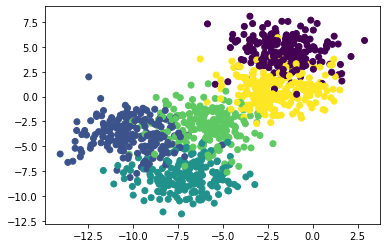

In [46]:
X, y = make_blobs(n_samples = 1000, centers = 5, cluster_std = 1.5, random_state = 1)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [78]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_recall_fscore_support


In [79]:
acc = []
pre = [] 
rec = [] 
f_m = []
for i in range(10):
    modelPer = Perceptron(random_state = i)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                          test_size=0.3, 
                                                          random_state=13)
    modelPer.fit(X_train, y_train)
    a = modelPer.score(X_valid, y_valid)
    acc.append(a)
    print(a)
    b = precision_recall_fscore_support(y_valid, modelPer.predict(X_valid), average='macro') 
    pre.append(b[0])
    rec.append(b[1])
    f_m.append(b[2])
    print(b)
    
print()
print(np.median(np.array(acc)))
print(np.median(np.array(pre)))
print(np.median(np.array(rec)))
print(np.median(np.array(f_m)))

0.6566666666666666
(0.6562375624938284, 0.6624338624338624, 0.6510803562629883, None)
0.7366666666666667
(0.8042676444267274, 0.726878306878307, 0.7099393662878813, None)
0.66
(0.544497938394373, 0.661005291005291, 0.580508596836059, None)
0.5866666666666667
(0.5717575757575757, 0.58010582010582, 0.5488064435733485, None)
0.7033333333333334
(0.5820351726774564, 0.7022222222222222, 0.6336951920029723, None)
0.6566666666666666
(0.5607679396684524, 0.6575132275132275, 0.5975575676519818, None)
0.69
(0.7149931280560328, 0.6938095238095239, 0.670360275196753, None)
0.7333333333333333
(0.7902687494168654, 0.7244444444444444, 0.7141579438793061, None)
0.6733333333333333
(0.6012776762659666, 0.6684656084656085, 0.6062721118223965, None)
0.7166666666666667
(0.6024432337385429, 0.7186772486772487, 0.6454454346852044, None)

0.6816666666666666
0.6018604550022548
0.6811375661375663
0.6395703133440884


In [80]:
np.median(cross_val_score(modelPer, X, y, cv=5))

0.68

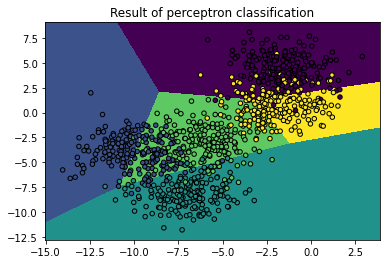

In [51]:
modelPer = Perceptron(random_state = 1)
modelPer.fit(X_train, y_train)
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = modelPer.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:, 0], X[:, 1], c=y,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Result of perceptron classification")

plt.show()

# Логистическая регрессия

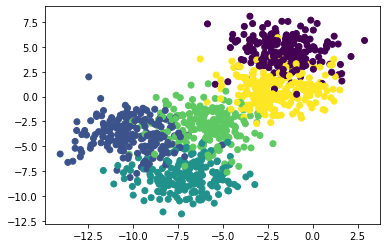

In [52]:
X, y = make_blobs(n_samples = 1000, centers = 5, cluster_std = 1.5, random_state = 1)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [82]:
from sklearn.linear_model import LogisticRegression

acc = []
pre = [] 
rec = [] 
f_m = []
for i in range(10):
    modelLog = LogisticRegression(max_iter = 200, solver = 'sag')
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                          test_size=0.3, 
                                                          random_state=i)
    modelLog.fit(X_train, y_train)
    a = modelLog.score(X_valid, y_valid)
    acc.append(a)
    print(a)
    b = precision_recall_fscore_support(y_valid, modelLog.predict(X_valid), average='macro') 
    pre.append(b[0])
    rec.append(b[1])
    f_m.append(b[2])
    print(b)

print()
print(np.median(np.array(acc)))
print(np.median(np.array(pre)))
print(np.median(np.array(rec)))
print(np.median(np.array(f_m)))

0.9033333333333333
(0.9042168217058508, 0.904261843740217, 0.9038639690772768, None)
0.8966666666666666
(0.895843032669658, 0.8960421497060864, 0.8958580094834936, None)
0.8866666666666667
(0.8865409175754003, 0.887293356051031, 0.8861496425101979, None)
0.8666666666666667
(0.864432426635082, 0.8639494504285793, 0.8640669605047101, None)
0.88
(0.8814240219592794, 0.8806546777840587, 0.8807053555693776, None)
0.88
(0.8756124339532011, 0.8835734101579172, 0.8775556696345017, None)
0.8966666666666666
(0.8976682194616977, 0.896124086641328, 0.8959222945710694, None)
0.8733333333333333
(0.8708282803724883, 0.8731780881132826, 0.871441376565457, None)
0.8766666666666667
(0.8764751683193941, 0.8786499517839923, 0.876872571358675, None)
0.9066666666666666
(0.9086491343843075, 0.9090766842958544, 0.9069811112723054, None)

0.8833333333333333
0.8839824697673399
0.8854333831044741
0.8834274990397877


In [71]:
np.median(cross_val_score(modelLog, X, y, cv=5))

0.87

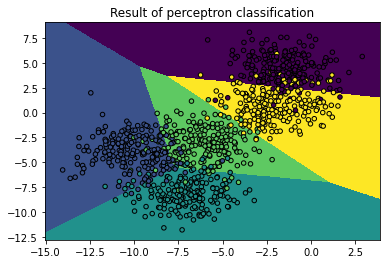

In [73]:
modelLog = LogisticRegression(max_iter = 200, solver = 'sag')
modelLog.fit(X_train, y_train)
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = modelLog.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:, 0], X[:, 1], c=y,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Result of perceptron classification")

plt.show()

# Датасет

In [309]:
data = pd.read_csv('data/drug_consumption.csv', sep=',', header=None)

In [310]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [311]:
drop1 = [c for c in range(13, 18)]
drop2 = [c for c in range(19, 32)]
dropInd = drop1 + drop2
dropInd.insert(0,0)
data.drop(dropInd, axis = 1, inplace=True)

In [312]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,18
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL4
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL3
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL2
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL3


In [313]:
d =  {'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6}

In [314]:
data[13] = data[18].map(d)
data.drop([18], axis = 1, inplace=True)
data

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,4
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,3
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,2
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,3
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,6
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,6


In [315]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13
count,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292,2.989390
std,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701,2.287438
min,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000
25%,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,1.000000
50%,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,3.000000
75%,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400,5.000000
max,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,6.000000


In [316]:
data.groupby(13)[1].agg(['count'])

,count
13,
0,413
1,207
2,266
3,211
4,140
5,185
6,463


In [317]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 6)

In [318]:
X = data.iloc[:,:12].values
y = data.iloc[:,12].values

In [319]:
acc = []
pre = [] 
rec = [] 
f_m = []
for i in range(10):
    modelPer = Perceptron(random_state = i*i)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                          test_size=0.3, 
                                                          random_state=3)
    modelPer.fit(X_train, y_train)
    a = modelPer.score(X_valid, y_valid)
    acc.append(a)
    print(a)
    b = precision_recall_fscore_support(y_valid, modelPer.predict(X_valid), average='macro') 
    pre.append(b[0])
    rec.append(b[1])
    f_m.append(b[2])
    print(b)
    
print()
print(np.median(np.array(acc)))
print(np.median(np.array(pre)))
print(np.median(np.array(rec)))
print(np.median(np.array(f_m)))

0.2826855123674912
(0.24101217718330528, 0.2503867439198412, 0.23927144437714457, None)
0.29858657243816256
(0.213361603488716, 0.261699570799282, 0.20841443057175338, None)
0.31802120141342755
(0.23843283381630367, 0.25733005236468376, 0.23335515362734746, None)
0.3657243816254417
(0.28787892876769205, 0.27442948155279184, 0.24080615184571838, None)
0.31625441696113077
(0.24167546019468494, 0.25429537508763783, 0.24076955234137598, None)
0.21731448763250882
(0.20274711825713373, 0.2224826809924878, 0.19310916348137708, None)
0.2950530035335689
(0.2147891072451275, 0.2346924848413338, 0.21173855853917697, None)
0.392226148409894
(0.25559485865608317, 0.279566338537449, 0.24095863599374803, None)
0.3127208480565371
(0.24806217700331326, 0.24195052357520536, 0.2270134426621355, None)
0.30918727915194344
(0.24616657885982166, 0.24508100981483713, 0.2367758785138165, None)

0.31095406360424027
0.24134381868899513
0.25234105950373953
0.235065516070582


In [320]:
np.median(cross_val_score(modelPer, X, y, cv=10))

0.28835978835978837

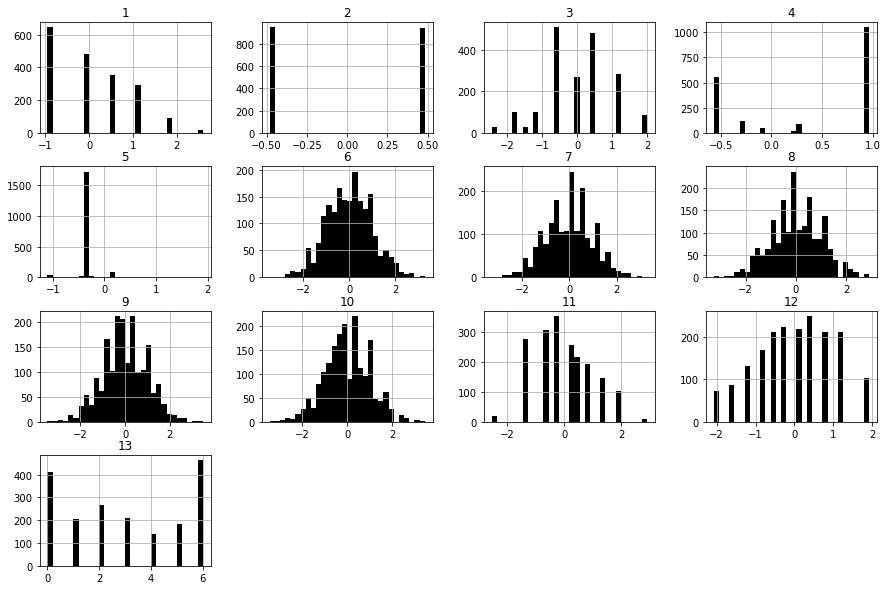

In [321]:
data.hist(color = 'k', bins = 30, figsize=(15,10))
plt.show()

In [336]:
from sklearn.datasets import load_iris

Xiris, yiris = load_iris(return_X_y=True)
modelLog = LogisticRegression(max_iter = 200, solver = 'sag', random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(Xiris, yiris, 
                                                          test_size=0.3, 
                                                          random_state=10)
modelLog.fit(X_train, y_train)
print(classification_report(y_valid, modelLog.predict(X_valid)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [322]:
from sklearn.metrics import classification_report

print(classification_report(y_valid, modelPer.predict(X_valid)))
data.groupby(13)[1].agg(['count'])

              precision    recall  f1-score   support

           0       0.53      0.55      0.54       121
           1       0.20      0.13      0.16        68
           2       0.21      0.42      0.28        84
           3       0.10      0.09      0.09        67
           4       0.09      0.05      0.06        40
           5       0.14      0.07      0.09        57
           6       0.46      0.40      0.43       129

    accuracy                           0.31       566
   macro avg       0.25      0.25      0.24       566
weighted avg       0.30      0.31      0.30       566



,count
13,
0,413
1,207
2,266
3,211
4,140
5,185
6,463


In [323]:
from sklearn.linear_model import LogisticRegression

acc = []
pre = [] 
rec = [] 
f_m = []
for i in range(10):
    modelLog = LogisticRegression(max_iter = 200, solver = 'sag')
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                          test_size=0.3, 
                                                          random_state=i)
    modelLog.fit(X_train, y_train)
    a = modelLog.score(X_valid, y_valid)
    acc.append(a)
    print(a)
    b = precision_recall_fscore_support(y_valid, modelLog.predict(X_valid), average='macro') 
    pre.append(b[0])
    rec.append(b[1])
    f_m.append(b[2])
    print(b)

print()
print(np.median(np.array(acc)))
print(np.median(np.array(pre)))
print(np.median(np.array(rec)))
print(np.median(np.array(f_m)))

0.4169611307420495
(0.25142768521971776, 0.2767997196432132, 0.24064151951849522, None)
0.43286219081272087
(0.28382201149700365, 0.29269584112082125, 0.25627714388529865, None)
0.4098939929328622
(0.26059554947636343, 0.28802203122217956, 0.2435486265445381, None)
0.42402826855123676
(0.3504184922700045, 0.3075842009415751, 0.27313069984180877, None)
0.43462897526501765
(0.3059576064425502, 0.28857224615921456, 0.2477340199322795, None)
0.43109540636042404
(0.3075182504441559, 0.2940633623928554, 0.24477483741368924, None)
0.44346289752650175
(0.3333733184109124, 0.3070923592857791, 0.27093189637330645, None)
0.4204946996466431
(0.3549644828077172, 0.2921221479214013, 0.25155354812673125, None)
0.41872791519434627
(0.3213834307763758, 0.29201255782847524, 0.24715935303519412, None)
0.43992932862190814
(0.28360004290761703, 0.292167473049826, 0.25434262821193176, None)

0.42756183745583043
0.30673792844335307
0.29214481048561364
0.24964378402950538


In [324]:
np.median(cross_val_score(modelLog, X, y, cv=5))

0.4297082228116711

In [335]:
modelLog = LogisticRegression(max_iter = 200, solver = 'saga', random_state = 5)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                          test_size=0.3, 
                                                          random_state=67)
modelLog.fit(X_train, y_train)
print(classification_report(y_valid, modelLog.predict(X_valid)))
data.groupby(13)[1].agg(['count'])

              precision    recall  f1-score   support

           0       0.42      0.70      0.52       121
           1       0.30      0.20      0.24        64
           2       0.18      0.09      0.12        87
           3       0.24      0.11      0.15        62
           4       0.00      0.00      0.00        41
           5       0.50      0.04      0.07        51
           6       0.46      0.80      0.59       140

    accuracy                           0.40       566
   macro avg       0.30      0.28      0.24       566
weighted avg       0.34      0.40      0.33       566



,count
13,
0,413
1,207
2,266
3,211
4,140
5,185
6,463
